In [63]:
from pandas import read_csv
mnist = read_csv("https://www.openml.org/data/get_csv/52667/mnist_784.arff")
X, y  = mnist.iloc[:, :-1].values, mnist.iloc[:, -1].values
X.shape, y.shape

((70000, 784), (70000,))

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1 / 7, random_state = 0)

# Print images

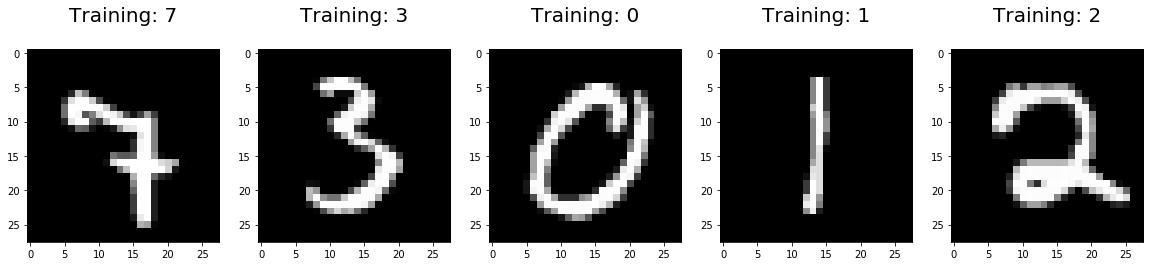

In [56]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(image.reshape(28,28), cmap=plt.cm.gray)
  plt.title('Training: %s\n' % label, fontsize = 20)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver = 'lbfgs', max_iter=400)
lg.fit(X_train, y_train)

C:\Users\Yuhao\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred = lg.predict(X_test)
score = lg.score(X_test, y_test)
score

0.9125

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

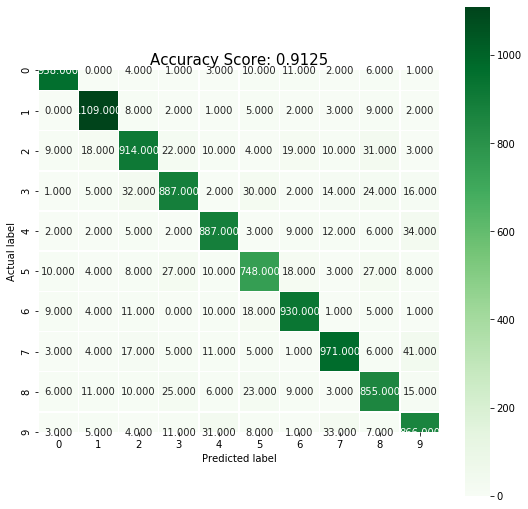

In [61]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [62]:
y_pred[:10], y_test[:10]

(array([0, 4, 1, 2, 4, 7, 7, 1, 1, 3], dtype=int64),
 array([0, 4, 1, 2, 7, 9, 7, 1, 1, 7], dtype=int64))